In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Peak around 3.5 amu - helium isotope?
path = 'ace_sis_low_2595.txt'
data = []
hist = []

with open(path, 'r') as file:
    for line in file:
        parts = line.split()
        if len(parts) == 3:
            if hist:
                data.append(hist)
            hist = [int(x) for x in parts]
        else:
            hist.extend(map(int, parts))

if hist:
    data.append(hist)

# I could probably just filter out only the columns I need
# instead of creating 60 bins to avoid quiet time data
cols = ['year', 'day', 'hour'] + [f'bin_{i+1}' for i in range(60)]
df = pd.DataFrame(data, columns=cols)

filtered = df[(df['day'] >= 315) & (df['day'] <= 341)]

filtered

,year,day,hour,bin_1,bin_2,bin_3,bin_4,bin_5,bin_6,bin_7,...,bin_51,bin_52,bin_53,bin_54,bin_55,bin_56,bin_57,bin_58,bin_59,bin_60
0,2023,315,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,2023,315,1,1,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0
2,2023,315,2,0,0,0,0,0,0,0,...,1,1,1,0,1,1,0,1,1,0
3,2023,315,3,0,0,0,1,0,0,0,...,2,0,1,0,0,2,0,0,0,0
4,2023,315,4,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,2023,341,19,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
644,2023,341,20,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
645,2023,341,21,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
646,2023,341,22,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


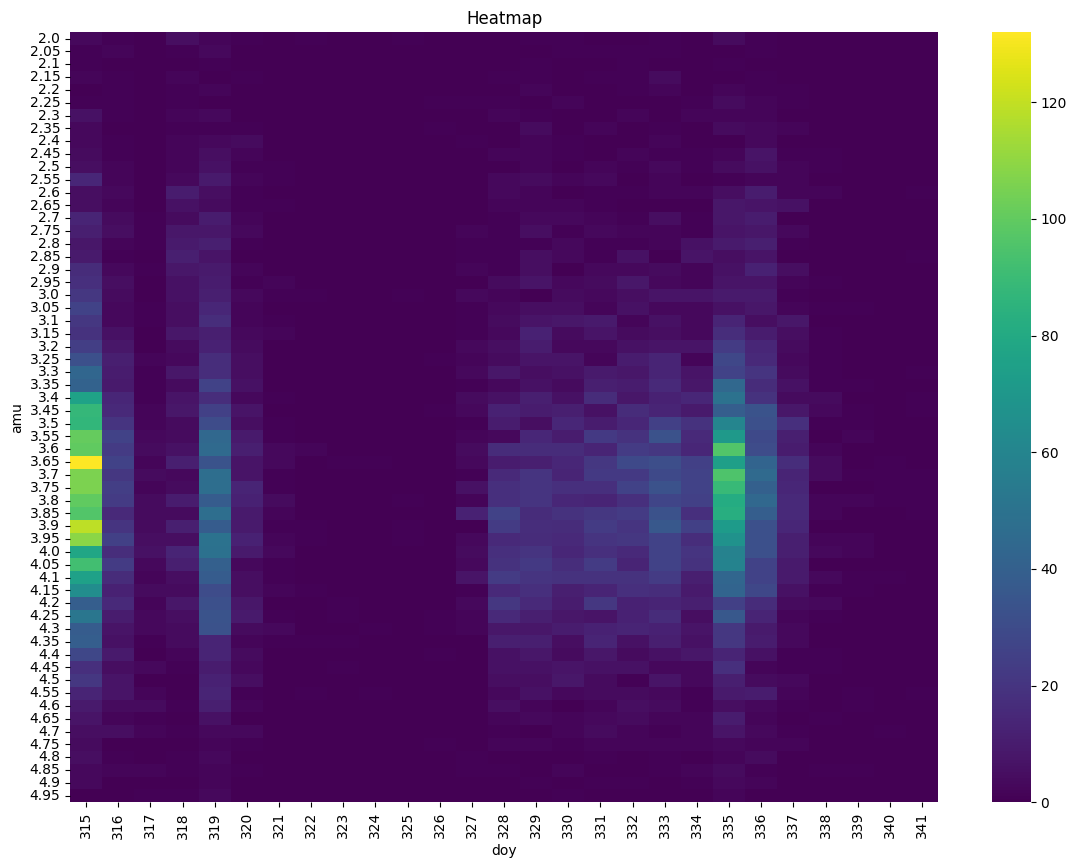

In [2]:
import seaborn as sns
df_filtered = df[(df['day'] >= 315) & (df['day'] <= 341)]
mass_matrix = np.zeros((60, df_filtered['day'].nunique()))
for i, day in enumerate(sorted(df_filtered['day'].unique())):
    daily_data = df_filtered[df_filtered['day'] == day]
    mass_matrix[:, i] = daily_data.iloc[:, 3:].sum(axis=0)

doy_axis = sorted(df_filtered['day'].unique())
mass_axis = np.linspace(2, 2 + 0.05 * 59, 60)

plt.figure(figsize=(14, 10))
sns.heatmap(mass_matrix, yticklabels=np.round(mass_axis, 2), xticklabels=doy_axis, cmap='viridis')
plt.title('Heatmap')
plt.ylabel('amu')
plt.xlabel('doy')
plt.xticks(rotation=90)
plt.show()


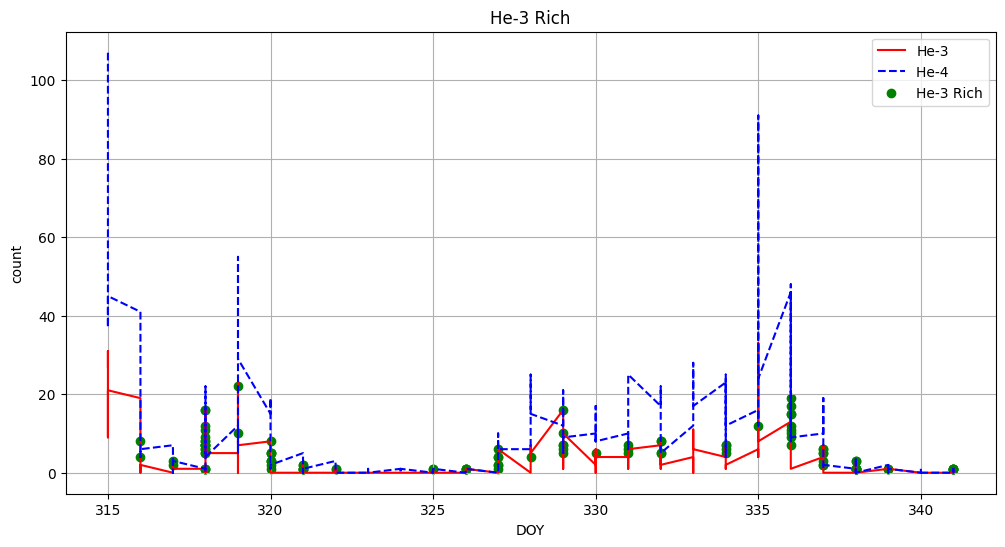

In [19]:
threshold_index = int((3.5 - 2) / 0.05)  # From 2 amu with 0.05 amu steps
filtered['He-3'] = filtered.iloc[:, 3:threshold_index+3].sum(axis=1)
filtered['He-4'] = filtered.iloc[:, threshold_index+3:63].sum(axis=1)
filtered['He-3 Rich Period'] = filtered['He-3'] > 0.5 * filtered['He-4']
rich_days = filtered[filtered['He-3 Rich Period']]['day']

plt.figure(figsize=(12, 6))
plt.plot(filtered['day'], filtered['He-3'], label='He-3', color='red')
plt.plot(filtered['day'], filtered['He-4'], label='He-4 ', color='blue', linestyle='--')
plt.scatter(rich_days, filtered.loc[filtered['He-3 Rich Period'], 'He-3'], color='green', marker='o', label='He-3 Rich')
plt.title('He-3 Rich')
plt.xlabel('DOY')
plt.ylabel('count')
plt.legend()
plt.grid(True)
plt.show()

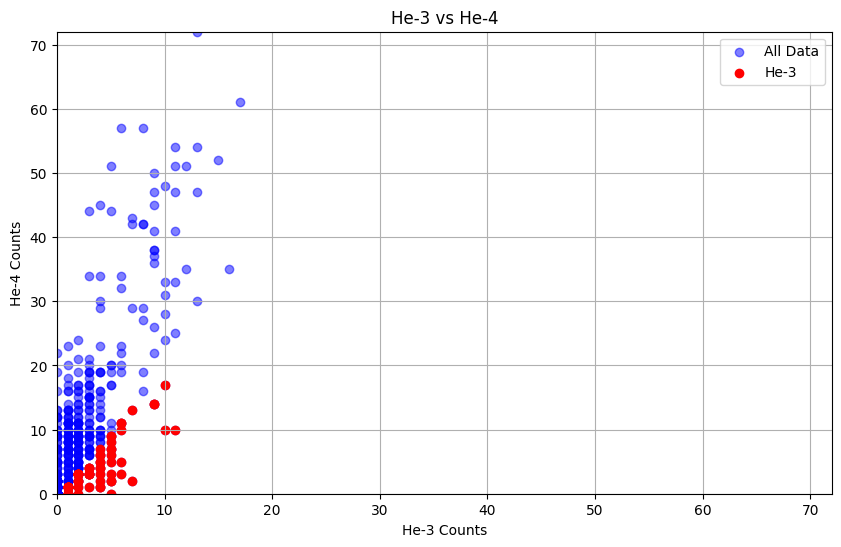

In [17]:
# Are these values fixed?
he3_start = int((2.7 - 2) / 0.05)
he3_end = int((3.3 - 2) / 0.05)
he4_start = int((3.7 - 2) / 0.05)
he4_end = int((4.3 - 2) / 0.05)
in_between_start = int((3.3 - 2) / 0.05)
in_between_end = int((3.7 - 2) / 0.05)
df['He-3'] = df.iloc[:, 3+he3_start:3+he3_end+1].sum(axis=1)
df['He-4'] = df.iloc[:, 3+he4_start:3+he4_end+1].sum(axis=1)
df['In-Between'] = df.iloc[:, 3+in_between_start:3+in_between_end+1].sum(axis=1)
df['He-3 Rich'] = df['He-3'] > 0.5 * df['He-4']


plt.figure(figsize=(10, 6))
plt.scatter(df['He-3'], df['He-4'], color='blue', label='All Data', alpha=0.5)
he3_rich_data = df[df['He-3 Rich']]
plt.scatter(he3_rich_data['He-3'], he3_rich_data['He-4'], color='red', label='He-3')
plt.xlabel('He-3 Counts')
plt.ylabel('He-4 Counts')
plt.title('He-3 vs He-4')
max_count = max(df['He-3'].max(), df['He-4'].max())
plt.xlim(0, max_count)
plt.ylim(0, max_count)
plt.legend()
plt.grid(True)
plt.show()
